# Projet 6 - Analysez les ventes d'une librairie avec R ou Python

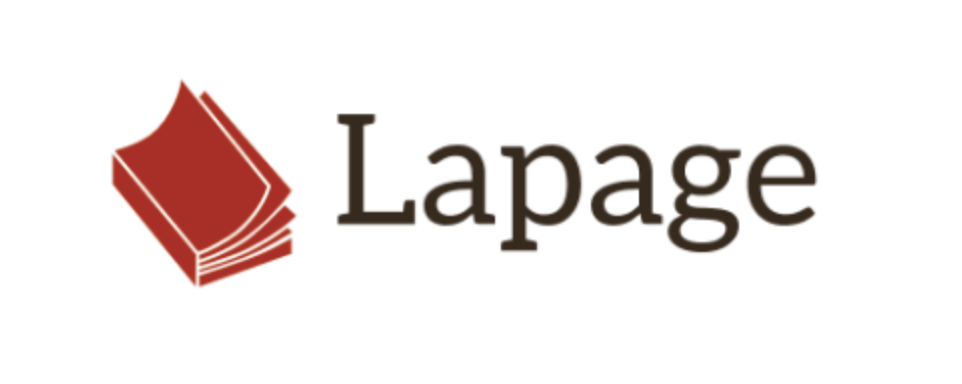

In [1]:
#Librairies 
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from sklearn import metrics

In [2]:
#Mise en forme fond graphique 
sns.set_theme()

# Exploration des données
On dispose de 3 jeux de données : clients, produits et transactions.

In [3]:
#Importation des données
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# Customers

In [4]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


Je vérifie tout d'abord qu'il n'y ai pas de doublon. Je vais le faire pour toute les tables alors je créé une fonction doublons.

In [5]:
def doublons(df): # Nombre de doublons dans la dataframe
    print(len(df) - len(df.drop_duplicates()), 'doublons')

doublons(customers)

0 doublons


Je vérifie que client_id est bien une clé primaire pour mes futures jointure. Je créé une fonction car celle ci me servira pour les autres tables aussi.

In [6]:
def cle_primaire(df_cle): # Vérification de la clé primaire
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(customers['client_id'])

Clé primaire (0 doublon)


Client_id est bien une clé primaire, je vérifie qu'il n'y ai pas de valeur manquante et le type des données.

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [8]:
customers.describe(include='all') # Indicateurs statistiques

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Je peux voir que les années de naissance de nos clients se situent entre 1929 et 2004. Je vérifie maintenant les différentes modalités de la variable 'sex', afin de ne pas avoir de valeur abérante.

In [9]:
print('Modalités de \'sex\' :', list(customers['sex'].unique()))

Modalités de 'sex' : ['f', 'm']


# Products

In [10]:
products.sample(5)

,id_prod,price,categ
2686,0_311,6.99,0
611,1_536,11.21,1
1580,0_561,6.99,0
307,2_146,115.30,2
2220,0_1215,31.99,0


Je vérifie tout d'abord qu'il n'y ai pas de doublon

In [11]:
doublons(products)

0 doublons


Je vérifie que id_prod peut être une clé primaire pour mes futures jointure.

In [12]:
cle_primaire(products['id_prod'])

Clé primaire (0 doublon)


id_prod peut être une clé primaire. Je vérifie qu'il n'y ai pas de valeur manquante et le type des données de chaque variable.

In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [14]:
products.describe(include='all') # Indicateurs statistiques

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Nous pouvons voir que les prix se situent entre -1 et 300 euros. Vérifions la valeur -1 qui est une valeur abérante dans une colonne prix.

In [15]:
products.sort_values(by='price') # Produit affichant un prix négatif

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


Je peux voir que le prix -1 est lié à l'i_prod T_0. En effet, aprés avoir étudié les données, T_0 est l'id qui sert a faire des tests, il est lié aux client_id CT_0 et CT_1. Je vérifie maintenant les différentes modalités de la variable 'categ' :

In [16]:
print('Modalités de \'categ\' :', list(products['categ'].unique()))

Modalités de 'categ' : [0, 1, 2]


# Transactions

In [17]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


Je vérifie le type de mes variables et les valeurs manquantes de ma table transaction :

In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Je vois que ma variable date est en object, alors qu'elle devrait être en datetime.

Je vérifie tout d'abord qu'il n'y ai pas de doublon

In [19]:
doublons(transactions)

126 doublons


In [20]:
doublon_transac = transactions[transactions.duplicated()]
doublon_transac

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Je vois que ce sont des valeurs test, je supprime les 126 doublons dans la table.

In [21]:
transactions.drop_duplicates(inplace=True)

In [22]:
#Je vérifie le nombre de ligne après la suppression des doublons
print(len(transactions))

679406


Dans la table transaction je vérifie que client_id et date peuvent être la clé primaire de ma table.

In [23]:
cle_primaire(transactions[['client_id', 'date']])

Clé primaire (0 doublon)


In [24]:
transactions.describe(include='all') # Indicateurs statistiques

,id_prod,date,session_id,client_id
count,679406,679406,679406,679406
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237449,s_0,c_1609
freq,2252,2,74,25488


Il y a moins d'identifiants de session uniques que de dates : une même session peut donc contenir plusieurs dates de transactions. Chaque client peut totaliser plusieurs sessions.

La table ne contient aucune valeur manquante, mais comme aperçu dans les indicateurs et dans les doublons de la table, la variable 'date' affiche des valeurs aberrantes ayant pour préfixe test_ .

Je vérifie ces valeurs en prenant les 75 première ligne triés par date :

In [25]:
transactions_test = transactions.sort_values(by='date', ascending=False).head(75).reset_index() 
transactions_test

,index,id_prod,date,session_id,client_id
0,246980,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
1,670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
2,19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
3,392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
4,312697,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
...,...,...,...,...,...
70,85486,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
71,103119,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
72,607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
73,91133,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1


Ces 74 valeurs concernent le produit au prix négatif (T_0), ainsi que des identifiants de session S_0 et les id_clients test je pense (ct_0 & ct_1). (Aperçu lors de l'exploration des données avant l'importation)

In [26]:
transactions_test = transactions_test.loc[:73] # Je réduis ma table au 74 lignes test.

Ensuite dans ces lignes tests, je vérifie les données, ce qui par la suite me permettra de les supprimer de la table :

In [27]:
print( # Affichage des clés uniques des lignes de test 
    len(transactions_test), 'lignes tests :',
    '\n- \'id_prod\' unique :', transactions_test['id_prod'].unique(),
    '\n- \'session_id\' unique :', transactions_test['session_id'].unique(),
    '\n- \'client_id\' uniques :', transactions_test['client_id'].unique())

74 lignes tests : 
- 'id_prod' unique : ['T_0'] 
- 'session_id' unique : ['s_0'] 
- 'client_id' uniques : ['ct_0' 'ct_1']


# Jointure

J'effectue la jointure de transactions successivement sur clients et produits, en ne conservant que les clés de transactions (les clients inactifs et les produits invendus sont écartés).

In [28]:
data = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod') 
data.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0


In [29]:
#Je vérifie ma jointure.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679405
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679406 non-null  object 
 1   date        679406 non-null  object 
 2   session_id  679406 non-null  object 
 3   client_id   679406 non-null  object 
 4   sex         679406 non-null  object 
 5   birth       679406 non-null  int64  
 6   price       679185 non-null  float64
 7   categ       679185 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 46.7+ MB


Les variables 'price' et 'categ' affichent un même nombre de valeurs manquantes.

# Nettoyage des données
## Lignes tests

Je commence par supprimer les lignes test de la table, en creant une table filtrant les lignes tests.

In [30]:
lignes_test = data[ 
    (data['date'].str.contains('test_')) &
    (data['price']<=0) &
    (data['id_prod']=='T_0') &  
    (data['session_id']=='s_0')]
lignes_test

,id_prod,date,session_id,client_id,sex,birth,price,categ
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,2001,-1.0,0.0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,f,2001,-1.0,0.0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,m,2001,-1.0,0.0
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,f,2001,-1.0,0.0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,f,2001,-1.0,0.0
...,...,...,...,...,...,...,...,...
577222,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0,f,2001,-1.0,0.0
592959,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1,m,2001,-1.0,0.0
607783,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0,f,2001,-1.0,0.0
625936,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0,f,2001,-1.0,0.0


Je retrouve mes 74 lignes de ma table transactions_test que je supprime de mon df :
- valeurs aberrantes (-1)
- préfixe test_ dans les dates
- faux clients ct_0 et ct_1
- sessions s_0.

In [31]:
data = data.drop(lignes_test.index).reset_index() # Suppression des lignes tests

In [32]:
#Je vérifie la suppression 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       679332 non-null  int64  
 1   id_prod     679332 non-null  object 
 2   date        679332 non-null  object 
 3   session_id  679332 non-null  object 
 4   client_id   679332 non-null  object 
 5   sex         679332 non-null  object 
 6   birth       679332 non-null  int64  
 7   price       679111 non-null  float64
 8   categ       679111 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 46.6+ MB


## Valeurs manquantes

In [33]:
#J'analyse les valeurs manquantes en les mettant dans un nouveau df
data_na = data[data['price'].isnull()]
data_na

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
2633,2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,NaN,NaN
10103,10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,NaN,NaN
11723,11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,NaN,NaN
15670,15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,NaN,NaN
16372,16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,NaN,NaN
...,...,...,...,...,...,...,...,...,...
669533,669606,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,NaN,NaN
670484,670558,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,NaN,NaN
671088,671162,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,NaN,NaN
675480,675554,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,NaN,NaN


Je vois que les données na dans price et categ sont liés aux mêmes lignes et sont toutes attribué à l'id_prod 0_2245. (221 lignes) J'en déduis que l'id_prod 0_2245 n'étais pas présente dans la table product, je vérifie :

In [34]:
produit_2245 = products[products['id_prod']=='0_2245'] 
produit_2245

,id_prod,price,categ


Nous pouvons voir que la référence id_prod 0_2245 représente 221 lignes dans notre table finale et elle n'est pas présente dans notre table products.
Nous avons la possibilité de créer l'id_prod 0_2245 en faisant une imputation (par la moyenne, le mode...) ou encore de supprimer les données.
Je choisi de faire une imputation :
- nous pouvons déjà trouvé la catégorie du produit, car c'est le prefixe situé dans l'id_prod qui correspond à la catégorie, ici 0 (à vérifier)
- faire une imputation par la moyenne, le mode ou la médiane. 

Je vérifie mon hypothese concernant le préfixe de l'id prod qui correspond à la catégorie du produit :

In [35]:
data_test = data.dropna() # Échantillon de l'ensemble des commandes, sans le produit 0_2245

# Conversion en string des 2 premiers caractères de la valeur de 'id_prod'
data_test['id_prod'] = data_test['id_prod'].str[:2]

print('Préfixes de \'id_prod\' :') # Pour chaque catégorie, le préfixe unique de 'id_prod'
for i in data_test['categ'].unique():
    print('- catégorie', i, ':',
        data_test[data.dropna()['categ']==i]['id_prod'].unique())

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_99943/1400177663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['id_prod'] = data_test['id_prod'].str[:2]


Préfixes de 'id_prod' :
- catégorie 0.0 : ['0_']
- catégorie 1.0 : ['1_']
- catégorie 2.0 : ['2_']


Le prefixe de l'id prod correspond bien à la categorie du produit.Je remplace les valeurs manquantes de la variable 'categ' par 0 :

In [36]:
data['categ'].replace(np.nan, 0, inplace=True)
produit_2245 = data[data['id_prod']=='0_2245']
produit_2245.sample(5)

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
640792,640865,0_2245,2022-11-26 17:52:55.561657,s_303184,c_6990,f,1986,NaN,0.0
164614,164647,0_2245,2022-06-23 15:57:44.266387,s_228163,c_5869,f,1952,NaN,0.0
498508,498572,0_2245,2022-08-16 05:53:01.627491,s_253949,c_7954,m,1973,NaN,0.0
535076,535142,0_2245,2022-05-10 21:31:18.303110,s_206615,c_3519,m,1974,NaN,0.0
416425,416487,0_2245,2021-05-01 03:35:03.146305,s_28235,c_5714,f,1972,NaN,0.0


En ce qui concerne la variable prix, nous allons voir si il y a des correlations avec d'autres variables (age, categ).

In [37]:
data.corr(method='spearman')

,index,birth,price,categ
index,1.000000,0.002828,0.000888,0.001208
birth,0.002828,1.000000,0.054915,0.036664
price,0.000888,0.054915,1.000000,0.686358
categ,0.001208,0.036664,0.686358,1.000000


Les indices de corrélation confirment que la variable catégories est corrélé avec le prix. Il existe aussi une corrélation avec la variable age mais moins forte. On pourrait donc déterminer le prix en se basant sur les indicateurs de prix dans la catégorie 0. Je calcule pour la catégorie 0, la moyenne, le prix median et le mode.

In [38]:
print('Catégorie 0 :',
    '\n- Prix moyen :', round(data[data['categ']==0]['price'].mean(), 2), # Prix moyen
    '\n- Prix médian :', data[data['categ']==0]['price'].median(), # Prix médian
    '\n- Mode :', data[data['categ']==0]['price'].mode().values[0]) # Prix le plus fréquent

Catégorie 0 : 
- Prix moyen : 10.64 
- Prix médian : 9.99 
- Mode : 4.99


Je choisis de remplacer le prix de l'id_prod 0_2245 par le prix median : 9,99.
> Le remplacement des données manquantes par le mode n'est pas une pratique courante pour les variables numériques. Si la variable est faussée, la moyenne est biaisée par les valeurs à l'extrémité de la distribution. Par conséquent, la médiane est une meilleure représentation de la majorité des valeurs de la variable.

In [39]:
data['price'].replace(np.nan, 9.99, inplace=True)
produit_2245 = data[data['id_prod']=='0_2245']
produit_2245.sample(5)

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
640171,640244,0_2245,2022-08-11 04:36:55.259042,s_251550,c_4333,m,1956,9.99,0.0
200415,200456,0_2245,2021-05-12 03:36:34.586221,s_33316,c_6205,f,1984,9.99,0.0
450188,450250,0_2245,2022-04-06 01:51:40.749182,s_189860,c_2039,f,1982,9.99,0.0
104025,104051,0_2245,2022-09-15 14:26:50.187952,s_268455,c_1403,f,1978,9.99,0.0
417648,417710,0_2245,2021-09-23 07:22:38.636773,s_94139,c_4746,m,1940,9.99,0.0


## Convertion de la variable date

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       679332 non-null  int64  
 1   id_prod     679332 non-null  object 
 2   date        679332 non-null  object 
 3   session_id  679332 non-null  object 
 4   client_id   679332 non-null  object 
 5   sex         679332 non-null  object 
 6   birth       679332 non-null  int64  
 7   price       679332 non-null  float64
 8   categ       679332 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 46.6+ MB


In [41]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       679332 non-null  int64         
 1   id_prod     679332 non-null  object        
 2   date        679332 non-null  datetime64[ns]
 3   session_id  679332 non-null  object        
 4   client_id   679332 non-null  object        
 5   sex         679332 non-null  object        
 6   birth       679332 non-null  int64         
 7   price       679332 non-null  float64       
 8   categ       679332 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 46.6+ MB


Pour visualiser les données je fais un graphique.

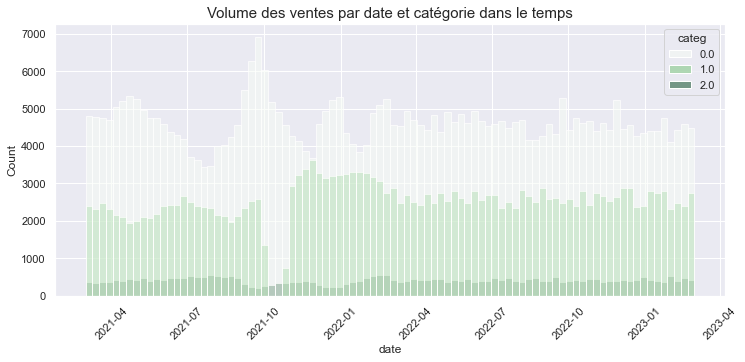

In [42]:
plt.figure(figsize=(12,5))
sns.histplot(data=data, x='date', hue='categ', palette='Greens')
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie dans le temps', fontsize=15)
plt.show()

In [43]:
print('Transactions du', str(data['date'].min())[:10], 'au', str(data['date'].max())[:10])

Transactions du 2021-03-01 au 2023-02-28


Je m'aperçois qu'il manque des données pour la catégorie 1 sur le mois d'octobre. Je pense que c'est un souci de remonté de données. J'analyse les données du mois d'octobre 2021.

In [44]:
# Transactions du mois octobre, all catégorie 2021 & 2022
octobre2021 = data[(data['date']>='2021-10-01') & (data['date']<='2021-10-31')]
# Transactions du mois d'octobre 21 & 22 categorie 1
octobre_cat1_21 = octobre2021[octobre2021['categ']==1].groupby([octobre2021['date'].dt.date])['price'].sum()
octobre_cat1_21

date
2021-10-01    7003.79
2021-10-28    6317.99
2021-10-29    6425.18
2021-10-30    6753.69
Name: price, dtype: float64

On peut voir que nous avons pour octobre 2021 uniquement 4 jours de données concernant les ventes. Nous pouvons faire une imputation ou encore supprimer les données du mois d'octobre 2021. 

Pour ne pas biaisé l'analyse je décide de supprimer le mois d'octobre.
Nous avons déjà une table qui contient toutes les données du mois d'octobre 2021 avec toutes les catégories. // octobre2021 = data[(data['date']>='2021-10-01') & (data['date']<='2021-10-31')] // Je supprime donc mes données à l'aide de cette table.

In [45]:
octobre2021.sample(5)

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
232266,232309,0_2307,2021-10-13 06:40:10.702777,s_104060,c_4088,f,1951,6.99,0.0
125202,125231,2_164,2021-10-20 16:33:02.958190,s_107626,c_3927,f,2003,52.26,2.0
127813,127842,0_171,2021-10-16 08:27:30.637540,s_105530,c_1609,m,1980,18.99,0.0
423541,423603,0_2289,2021-10-19 21:32:05.732507,s_107250,c_582,f,1941,17.99,0.0
458708,458770,0_1453,2021-10-26 17:42:20.651711,s_110507,c_4900,f,1974,7.99,0.0


In [46]:
data.drop(octobre2021.index, inplace=True) # Suppression des données du mois d'octobre

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658664 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       658664 non-null  int64         
 1   id_prod     658664 non-null  object        
 2   date        658664 non-null  datetime64[ns]
 3   session_id  658664 non-null  object        
 4   client_id   658664 non-null  object        
 5   sex         658664 non-null  object        
 6   birth       658664 non-null  int64         
 7   price       658664 non-null  float64       
 8   categ       658664 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 50.3+ MB


Mon df est prêt, je vais commencer mon analyse, mais tout d'abord je vais rajouter des données pour mes analyses.

# Ajout des variables

- date fixe
- année/mois
- l'age des clients
- définir des tranches d'ages
- nb de produit vendus par id_prod
- fréquence d'achat
- panier moyen
- montant des achats

## Variable : date_fixe

In [48]:
data['date_fixe'] = data['date'].dt.date 

## Variable : année/mois

In [49]:
# Création d'une colonne année
data['year'] = data.date.apply(lambda x: x.year)

# Creation d'une colonne mois
data['month'] = data.date.apply(lambda x: x.month)

# Creation d'une colonne année/mois 
data['yearmonth'] = data.date.apply(lambda x: int(str(x.year) + str(x.month).zfill(2)))

## Variable : âge des clients

In [50]:
year = datetime.now().year # Année courante
data['age'] = year - data['birth'] # Âge du client
data.sample()

,index,id_prod,date,session_id,client_id,sex,birth,price,categ,date_fixe,year,month,yearmonth,age
612170,612242,1_364,2022-02-10 20:51:30.568541,s_163121,c_4604,m,1970,10.3,1.0,2022-02-10,2022,2,202202,52


In [51]:
#Je vérifie le plus petit et le plus grand age de mes données pour définir mes tranches d'age
data.describe()['age']

count    658664.000000
mean         44.223112
std          13.615401
min          18.000000
25%          35.000000
50%          42.000000
75%          52.000000
max          93.000000
Name: age, dtype: float64

## Variable : classe d'âges

In [52]:
# Classe d'âge
data['classe_age'] = '18-30'
data['classe_age'].loc[data[data['age']>=30].index] = '30-40'
data['classe_age'].loc[data[data['age']>=40].index] = '40-50'
data['classe_age'].loc[data[data['age']>=50].index] = '50-60'
data['classe_age'].loc[data[data['age']>=60].index] = '60-70'
data['classe_age'].loc[data[data['age']>=70].index] = '70-80'
data['classe_age'].loc[data[data['age']>=80].index] = '80 et +'
data.sample()

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_99943/1797593708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['classe_age'].loc[data[data['age']>=30].index] = '30-40'
/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_99943/1797593708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['classe_age'].loc[data[data['age']>=40].index] = '40-50'
/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_99943/1797593708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,index,id_prod,date,session_id,client_id,sex,birth,price,categ,date_fixe,year,month,yearmonth,age,classe_age
344599,344656,0_271,2022-04-04 01:53:47.832948,s_188939,c_8141,f,1983,10.99,0.0,2022-04-04,2022,4,202204,39,30-40


## Variable : nb de produit vendus par id_prod

In [53]:
data = data.merge(
    data.groupby('id_prod').count()['date'].reset_index().rename(columns={'date': 'size_idprod'}),
    how='left', on='id_prod')
data.sample(6)

,index,id_prod,date,session_id,client_id,sex,birth,price,categ,date_fixe,year,month,yearmonth,age,classe_age,size_idprod
461150,475658,2_1,2021-08-22 04:00:23.434591,s_79019,c_7251,m,2001,56.99,2.0,2021-08-22,2021,8,202108,21,18-30,302
609194,628365,1_398,2022-06-09 09:48:52.790137,s_221081,c_6665,f,1961,10.17,1.0,2022-06-09,2022,6,202206,61,60-70,1906
366523,378119,1_442,2022-12-09 14:07:24.489843,s_309497,c_6953,m,1959,24.98,1.0,2022-12-09,2022,12,202212,63,60-70,1174
318951,329028,0_1382,2022-11-11 18:00:42.552691,s_296078,c_5883,f,1990,15.62,0.0,2022-11-11,2022,11,202211,32,30-40,792
6251,6442,0_998,2022-12-14 23:47:11.022723,s_312163,c_422,m,1958,9.41,0.0,2022-12-14,2022,12,202212,64,60-70,431
426417,439853,0_1027,2021-09-13 12:19:49.189206,s_89278,c_4609,f,1990,4.99,0.0,2021-09-13,2021,9,202109,32,30-40,473


# Sauvegarde du dataframe

In [54]:
data.to_csv('Librairie_Lapage_preparation_bdd.csv', sep='\t', encoding='utf-8')